In [435]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import plotly.express as px

In [436]:
dados = pd.read_csv('./dados_formatados.csv')

In [437]:
df = pd.DataFrame(dados)

In [438]:
df.head()

,Linha de prod,Ordem de prod,Data de prod,Gotas cortadas (toneladas),Peso médio (Kg),Cortes por minuto,Comprimento médio (mm),Diâmetro,Temperatura (F°),Tras-PV (F°),Fritas-PV (F°),Agit-PV (F°),Meio-PV (F°),Frente-PV (F°)
0,B1,193112,2024-01-01,21.8905,168.4,90.0,78.2,41.6,2059.52,2320.0,2310.0,2280.0,2260.0,2203.0
1,B1,193112,2024-01-02,21.8574,168.3,90.0,77.6,41.6,2053.04,2320.0,2310.0,2280.0,2260.0,2202.6
2,B1,193112,2024-01-03,0.9849,167.8,90.0,110.4,32.5,2505.02,2341.1,2302.9,2258.9,2220.3,2184.2
3,B1,192970,2024-01-03,20.9484,169.3,90.0,110.4,32.5,2505.02,2341.1,2302.9,2258.9,2201.6,2176.4
4,B1,192970,2024-01-04,21.0216,169.7,89.0,85.6,18.1,3094.52,2349.6,2299.8,2249.2,2201.0,2173.0


# Tratamento

### Renomeando e Transformando colunas

In [439]:
df['Data de prod'] = pd.to_datetime(df['Data de prod'])
df['Ordem de prod'] = df['Ordem de prod'].astype(str)
# df = df.rename(columns={'Gotas cortadas (unid.)': 'Gotas cortadas (toneladas)', 'Velocidade média (corte/min)': 'Cortes por minuto'})
df = df.rename(columns={'Peso médio (Kg)': 'Peso médio (g)'})

In [440]:
df['Linha de prod'].unique()

array(['B1'], dtype=object)

In [441]:
df.isnull()

,Linha de prod,Ordem de prod,Data de prod,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro,Temperatura (F°),Tras-PV (F°),Fritas-PV (F°),Agit-PV (F°),Meio-PV (F°),Frente-PV (F°)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Reordenando DataFrame

In [442]:
# cols = df.columns.tolist()
# cols_no_pv = [col for col in cols if "PV" not in col]
# cols_pv = [col for col in cols if "PV" in col]
# new_order = cols_no_pv + cols_pv

# df = df[new_order]

In [443]:
df_numerico = df.select_dtypes(include=[np.number])

df_numerico.describe().round(2)

,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro,Temperatura (F°),Tras-PV (F°),Fritas-PV (F°),Agit-PV (F°),Meio-PV (F°),Frente-PV (F°)
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,17.97,167.76,86.94,92.48,35.49,2034.46,2344.91,2308.48,2267.16,2230.63,2179.99
std,6.24,20.75,14.01,22.47,6.57,339.86,19.16,16.80,19.75,21.98,15.92
min,0.74,116.30,58.70,0.00,0.00,640.22,2249.90,2270.00,2208.50,2112.70,2115.30
25%,14.95,160.60,78.15,83.10,34.20,1920.96,2331.90,2300.00,2250.00,2213.67,2171.90
50%,20.32,171.05,88.00,93.00,37.00,2010.74,2349.60,2302.25,2264.10,2230.00,2176.05
75%,21.55,174.80,96.00,102.40,39.30,2152.27,2354.80,2321.70,2281.15,2242.82,2187.00
max,26.05,203.00,124.00,144.70,42.80,3369.74,2390.00,2360.10,2301.20,2286.90,2223.00


# Correlação

In [444]:
correlation_matrix = df_numerico.corr()

fig_temp_perdas = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale="Viridis",
    labels=dict(color="Correlação"),
)

fig_temp_perdas.show()

# Agrupando por Mês e Ordem de Produção  

## Médias 

In [445]:
df_valores_mensais = df.copy()

df_valores_mensais.loc[:, 'Dia'] = df['Data de prod'].dt.day
df_valores_mensais.loc[:, 'Mês'] = df['Data de prod'].dt.month

colunas_numericas = df_numerico.columns.to_list()

media_mensal_ordem = df_valores_mensais.groupby(['Mês', 'Ordem de prod'])[colunas_numericas].mean()

media_mensal_ordem.iloc[:, 0] = media_mensal_ordem.iloc[:, 0].round(3)

media_mensal_ordem.iloc[:, 1:] = media_mensal_ordem.iloc[:, 1:].round(2)

media_mensal_ordem = media_mensal_ordem.sort_values(by=['Mês', 'Ordem de prod'])

media_mensal_ordem

Gotas cortadas (toneladas)  Peso médio (g)  \
Mês Ordem de prod                                               
1   192970                             19.865          169.91   
    193112                             14.911          168.17   
    193164                             19.677          147.47   
    193206                             18.578          171.15   
    193207                             13.275          170.50   
2   193207                             13.969          171.12   
    193208                              9.872          122.10   
    193209                             17.402          191.36   
    193342                             21.498          170.20   
    193368                             21.095          171.59   
3   193342                             19.571          169.75   
    193459                             12.529          190.83   
    193462                             18.197          172.44   
    193463                             13.674          172.20   
    193594                             19.100          171.77   
4   193533                             20.996          196.69   
    193535                             16.004          116.43   
    193537                             16.929          173.90   
    193594                             14.049          172.10   
    193619                             21.523          192.58   
    193671                             11.756          193.02   
    193686                             13.240          124.10   
    193688                             13.908          202.47   
    193689                             15.638          161.77   
    193692                             14.500          158.03   
    193694                             19.701          150.93   
5   193694                             15.832          151.65   
    193782                             17.014          132.28   
    193783                             20.045          188.67   
    193784                             17.378          174.43   
    193852                             17.225          198.52   
    193937                             18.987          172.30   
6   193882                             19.104          136.54   
    193937                             14.278          173.55   
    193972                             22.299          173.95   
    193973                             23.127          196.38   
    194029                             20.314          180.00   
    194057                             22.080          169.20   
    194113                             12.375          121.27   
    194121                             21.171          168.88   

                   Cortes por minuto  Comprimento médio (mm)  Diâmetro  \
Mês Ordem de prod                                                        
1   192970                     87.33                  125.51     30.97   
    193112                     90.00                   88.73     38.57   
    193164                     95.24                  100.12     35.43   
    193206                     89.35                   90.40     36.88   
    193207                     60.22                   98.45     36.58   
2   193207                     59.82                   98.08     36.55   
    193208                     82.40                   61.00     27.45   
    193209                     78.00                   44.37     12.19   
    193342                     88.37                  113.77     31.78   
    193368                     99.04                   77.51     33.83   
3   193342                     87.85                  115.77     34.79   
    193459                     60.23                   96.67     37.57   
    193462                     89.48                   86.08     40.20   
    193463                     59.84                   93.64     38.75   
    193594                     79.87                   90.52     39.32   
4   193533                    

In [446]:
media_mensal_ordem_reset = media_mensal_ordem.reset_index()

### Exportando para Excel

In [447]:
# with pd.ExcelWriter('media_mensal_.xlsx', engine='xlsxwriter') as writer:
#     media_mensal_ordem.to_excel(writer, sheet_name='Média Mensal por Ordem', index=True)

#     workbook  = writer.book
#     worksheet = writer.sheets['Média Mensal por Ordem']
    
#     for col in range(len(media_mensal_ordem.columns)):
#         worksheet.set_column(col, col, 20) 
    
#     worksheet.set_column(0, 1, 20)

## Totais 


In [448]:
total_mensal_ordem = df_valores_mensais.groupby(['Mês', 'Ordem de prod'])[['Gotas cortadas (toneladas)']].sum().round(3)

total_mensal_ordem = total_mensal_ordem.sort_index()

total_mensal_ordem

Gotas cortadas (toneladas)
Mês Ordem de prod                            
1   192970                            178.787
    193112                             44.733
    193164                            236.125
    193206                             74.312
    193207                             53.100
2   193207                             83.814
    193208                             19.744
    193209                            121.813
    193342                            193.479
    193368                            147.662
3   193342                            215.277
    193459                             37.587
    193462                             90.983
    193463                            109.396
    193594                            114.600
4   193533                            167.971
    193535                             48.013
    193537                             50.788
    193594                             14.049
    193619                            107.617
    193671                             47.026
    193686                             39.719
    193688                             41.725
    193689                             46.915
    193692                             43.501
    193694                             59.103
5   193694                             31.664
    193782                            187.151
    193783                             60.136
    193784                            191.157
    193852                             86.126
    193937                             18.987
6   193882                            152.828
    193937                             28.556
    193972                             44.599
    193973                             92.506
    194029                             81.256
    194057                             66.240
    194113                             37.126
    194121                            127.026

# Agrupando somente por mês

## Médias

In [449]:
media_mensal = media_mensal_ordem.groupby('Mês')[colunas_numericas].mean().round(2)

media_mensal

,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro,Temperatura (F°),Tras-PV (F°),Fritas-PV (F°),Agit-PV (F°),Meio-PV (F°),Frente-PV (F°)
Mês,,,,,,,,,,,
1,17.26,165.44,84.43,100.64,35.69,2233.43,2337.51,2311.67,2269.54,2233.31,2177.28
2,16.77,165.27,81.53,78.95,28.36,2097.58,2338.75,2304.54,2268.58,2235.24,2176.40
3,16.61,175.40,75.45,96.54,38.13,1916.19,2344.89,2308.79,2270.17,2237.55,2187.04
4,16.20,167.46,91.88,87.70,36.99,2089.96,2342.22,2304.69,2272.02,2234.74,2181.01
5,17.75,169.64,88.30,90.30,37.26,1907.75,2353.86,2310.03,2271.81,2234.70,2184.94
6,19.34,164.97,94.28,89.26,35.77,2010.21,2337.43,2312.61,2266.20,2231.74,2179.46


In [450]:
fig_gotas = px.bar(
    media_mensal, 
    x=media_mensal.index,
    y='Gotas cortadas (toneladas)',
    title="Gotas Cortadas por Mês",
    labels={'Mês': 'Mês', 'Gotas cortadas (toneladas)': 'Gotas Cortadas (toneladas)'},
    barmode='group'
)

fig_gotas.update_traces(
    text=media_mensal['Gotas cortadas (toneladas)'],
    textposition='outside'
)

fig_gotas.show()

# Médias de PV por mês
fig_pv = px.bar(
    media_mensal, 
    x=media_mensal.index, 
    y=['Tras-PV (F°)', 'Fritas-PV (F°)', 'Agit-PV (F°)', 'Meio-PV (F°)', 'Frente-PV (F°)'], 
    title="Temperaturas de PV por Mês",
    labels={'Mês': 'Mês', 'value': 'Temperatura (F°)'},
    barmode='group'
)
fig_pv.show()

# Médias das propriedades da gota por mês
fig_medidas = px.bar(
    media_mensal, 
    x=media_mensal.index, 
    y=['Peso médio (g)', 'Cortes por minuto', 'Comprimento médio (mm)', 'Diâmetro'],
    title="Medidas da Gota por Mês",
    labels={'Mês': 'Mês', 'value': 'Valor'},
    barmode='group'
)
fig_medidas.show()

## Totais

In [451]:
total_mensal_gotas = total_mensal_ordem.groupby('Mês')[['Gotas cortadas (toneladas)']].sum().sort_values('Gotas cortadas (toneladas)', ascending=False).round(3)

In [452]:
total_mensal_gotas

,Gotas cortadas (toneladas)
Mês,
4,666.427
6,630.137
1,587.057
5,575.221
3,567.843
2,566.512


In [453]:
fig_temp_perdas = px.bar(
    total_mensal_gotas, 
    x=total_mensal_gotas.index, 
    y='Gotas cortadas (toneladas)', 
    title='Total de Gotas Cortadas por Mês', 
    labels={'Mês': 'Mês', 'Gotas cortadas (toneladas)': 'Total de Gotas Cortadas'},
    color='Gotas cortadas (toneladas)'
)

fig_temp_perdas.update_traces(
    text=total_mensal_gotas['Gotas cortadas (toneladas)'],
    textposition='outside'
)

fig_temp_perdas.show()


# Agrupando somente por Ordem de Produção

## Médias

In [454]:
media_ordem = df_valores_mensais.groupby('Ordem de prod')[colunas_numericas].mean()

media_ordem.iloc[:, 0] = media_ordem.iloc[:, 0].round(3)

media_ordem.iloc[:, 1:] = media_ordem.iloc[:, 1:].round(2)

media_ordem

,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro,Temperatura (F°),Tras-PV (F°),Fritas-PV (F°),Agit-PV (F°),Meio-PV (F°),Frente-PV (F°)
Ordem de prod,,,,,,,,,,,
192970,19.865,169.91,87.33,125.51,30.97,2662.56,2348.88,2300.30,2250.90,2208.07,2176.10
193112,14.911,168.17,90.00,88.73,38.57,2205.86,2327.03,2307.63,2272.97,2246.77,2196.60
193164,19.677,147.47,95.24,100.12,35.43,1744.15,2350.00,2299.89,2246.67,2201.89,2173.90
193206,18.578,171.15,89.35,90.40,36.88,2284.43,2315.75,2322.15,2280.57,2258.52,2179.75
193207,13.691,170.87,59.98,98.23,36.56,2238.91,2348.35,2329.33,2298.58,2247.09,2160.38
193208,9.872,122.10,82.40,61.00,27.45,2179.31,2350.00,2306.35,2287.45,2257.50,2200.90
193209,17.402,191.36,78.00,44.37,12.19,2012.13,2342.77,2294.00,2254.57,2231.21,2164.76
193342,20.438,169.96,88.08,114.87,33.44,1895.29,2338.96,2301.08,2241.66,2211.40,2171.24
193368,21.095,171.59,99.04,77.51,33.83,2077.62,2314.71,2292.40,2259.54,2231.44,2182.84


## Totais

In [455]:
total_ordem = df_valores_mensais.groupby('Ordem de prod')[colunas_numericas].sum()
total_ordem['Gotas cortadas (toneladas)'] = total_ordem['Gotas cortadas (toneladas)'].round(3)
total_ordem[['Gotas cortadas (toneladas)']].sort_values('Gotas cortadas (toneladas)', ascending=False)

,Gotas cortadas (toneladas)
Ordem de prod,
193342,408.756
193164,236.125
193784,191.157
193782,187.151
192970,178.787
193533,167.971
193882,152.828
193368,147.662
193207,136.914


# Comportamento das temperaturas

## Comportamento diário

### Médias diárias das temperaturas por cada etapa

In [456]:
media_diaria_temperaturas = df_valores_mensais[['Tras-PV (F°)', 'Fritas-PV (F°)', 'Agit-PV (F°)', 
                                                'Meio-PV (F°)', 'Frente-PV (F°)', 'Temperatura (F°)']].mean()

df_temperaturas = media_diaria_temperaturas.reset_index()
df_temperaturas.columns = ['Etapa', 'Temperatura Média (F°)']

fig_temperaturas_diarias = px.bar(
    df_temperaturas, 
    x='Etapa', 
    y='Temperatura Média (F°)', 
    title="Média Diária das Temperaturas (PV)",
    labels={'Etapa': 'Etapas', 'Temperatura Média (F°)': 'Temperatura Média (F°)'},
    color='Etapa' 
)

fig_temperaturas_diarias.show()

### Diferença média das temperaturas nas etapas 

In [457]:
dif_tras_fritas = media_diaria_temperaturas['Tras-PV (F°)'] - media_diaria_temperaturas['Fritas-PV (F°)']
dif_fritas_agit = media_diaria_temperaturas['Fritas-PV (F°)'] - media_diaria_temperaturas['Agit-PV (F°)']
dif_agit_meio = media_diaria_temperaturas['Agit-PV (F°)'] - media_diaria_temperaturas['Meio-PV (F°)']
dif_meio_frente = media_diaria_temperaturas['Meio-PV (F°)'] - media_diaria_temperaturas['Frente-PV (F°)']
dif_frente_gota = media_diaria_temperaturas['Frente-PV (F°)'] - media_diaria_temperaturas['Temperatura (F°)']

df_media_dif_temperaturas = pd.DataFrame({
    'Diferença': ['Tras-Fritas (F°)', 'Fritas-Agitador (F°)', 'Agitador-Meio (F°)', 'Meio-Frente (F°)', 'Frente-Gota (F°)'],
    'Valor Médio (F°)': [dif_tras_fritas, dif_fritas_agit, dif_agit_meio, dif_meio_frente, dif_frente_gota]
}).round(2)

df_media_dif_temperaturas

,Diferença,Valor Médio (F°)
0,Tras-Fritas (F°),36.42
1,Fritas-Agitador (F°),41.32
2,Agitador-Meio (F°),36.53
3,Meio-Frente (F°),50.64
4,Frente-Gota (F°),145.53


In [458]:
fig_dif_temperaturas = px.bar(
    df_media_dif_temperaturas,
    x='Diferença',
    y='Valor Médio (F°)',
    title="Média das Diferenças de Temperaturas entre Etapas (PV)",
    labels={'Diferença': 'Diferenças', 'Valor Médio (F°)': 'Temperatura Média de Diferença (F°)'},
    color='Diferença' 
)

fig_dif_temperaturas.show()

## Comportamento mensal

In [459]:
df_valores_mensais['Diferença Tras-Fritas'] = df_valores_mensais['Tras-PV (F°)'] - df_valores_mensais['Fritas-PV (F°)']
df_valores_mensais['Diferença Fritas-Agit'] = df_valores_mensais['Fritas-PV (F°)'] - df_valores_mensais['Agit-PV (F°)']
df_valores_mensais['Diferença Agit-Meio'] = df_valores_mensais['Agit-PV (F°)'] - df_valores_mensais['Meio-PV (F°)']
df_valores_mensais['Diferença Meio-Frente'] = df_valores_mensais['Meio-PV (F°)'] - df_valores_mensais['Frente-PV (F°)']
df_valores_mensais['Diferença Frente-Gota'] = df_valores_mensais['Frente-PV (F°)'] - df_valores_mensais['Temperatura (F°)']

df_valores_mensais

,Linha de prod,Ordem de prod,Data de prod,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro,Temperatura (F°),Tras-PV (F°),...,Agit-PV (F°),Meio-PV (F°),Frente-PV (F°),Dia,Mês,Diferença Tras-Fritas,Diferença Fritas-Agit,Diferença Agit-Meio,Diferença Meio-Frente,Diferença Frente-Gota
0,B1,193112,2024-01-01,21.8905,168.4,90.0,78.2,41.6,2059.52,2320.0,...,2280.0,2260.0,2203.0,1,1,10.0,30.0,20.0,57.0,143.48
1,B1,193112,2024-01-02,21.8574,168.3,90.0,77.6,41.6,2053.04,2320.0,...,2280.0,2260.0,2202.6,2,1,10.0,30.0,20.0,57.4,149.56
2,B1,193112,2024-01-03,0.9849,167.8,90.0,110.4,32.5,2505.02,2341.1,...,2258.9,2220.3,2184.2,3,1,38.2,44.0,38.6,36.1,-320.82
3,B1,192970,2024-01-03,20.9484,169.3,90.0,110.4,32.5,2505.02,2341.1,...,2258.9,2201.6,2176.4,3,1,38.2,44.0,57.3,25.2,-328.62
4,B1,192970,2024-01-04,21.0216,169.7,89.0,85.6,18.1,3094.52,2349.6,...,2249.2,2201.0,2173.0,4,1,49.8,50.6,48.2,28.0,-921.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,B1,194121,2024-06-26,21.4124,169.0,88.0,124.3,32.6,1940.00,2340.0,...,2270.0,2230.0,2189.3,26,6,40.0,30.0,40.0,40.7,249.30
196,B1,194121,2024-06-27,21.4471,168.9,88.0,120.2,33.6,2056.28,2340.0,...,2269.6,2229.6,2187.0,27,6,40.0,30.4,40.0,42.6,130.72
197,B1,194121,2024-06-28,21.4906,169.3,88.0,124.1,34.2,2015.42,2340.0,...,2260.0,2220.0,2187.0,28,6,40.0,40.0,40.0,33.0,171.58
198,B1,194121,2024-06-29,21.4194,168.8,88.0,120.0,33.5,2020.28,2340.0,...,2260.0,2220.0,2187.0,29,6,40.0,40.0,40.0,33.0,166.72


### Média mensal das temperaturas

In [460]:
media_diferenca_pvs_mensal = df_valores_mensais.groupby('Mês')[['Diferença Tras-Fritas', 'Diferença Fritas-Agit', 
                                                          'Diferença Agit-Meio', 'Diferença Meio-Frente']].mean().round(2)

fig_diferenca_linear = px.bar(
    media_diferenca_pvs_mensal, 
    x=media_diferenca_pvs_mensal.index, 
    y=media_diferenca_pvs_mensal.columns, 
    title="Diferença Linear entre as Etapas por Mês",
    labels={'Mês': 'Mês', 'value': 'Diferença (F°)', 'variable': 'Etapa'},
    barmode='group'
)

fig_diferenca_linear.show()

# Trabalhando com Frente-PV e Temperatura da gota 

### Estatísticas 

In [461]:
df_frente_gota = df_valores_mensais[['Temperatura (F°)', 'Frente-PV (F°)', 'Mês']]

df_estatisticas_agrupado = pd.DataFrame({
    'Média': df_frente_gota[['Temperatura (F°)', 'Frente-PV (F°)']].mean().round(2),
    'Mediana': df_frente_gota[['Temperatura (F°)', 'Frente-PV (F°)']].median().round(2),
    'Desvio Padrão': df_frente_gota[['Temperatura (F°)', 'Frente-PV (F°)']].std().round(2)
}).T 

df_estatisticas_agrupado

,Temperatura (F°),Frente-PV (F°)
Média,2034.46,2179.99
Mediana,2010.74,2176.05
Desvio Padrão,339.86,15.92


### Estatísticas por Mês

In [462]:
df_estatisticas_agrupado = df_frente_gota.groupby('Mês').agg(
    Média=('Temperatura (F°)', 'mean'),
    Mediana=('Temperatura (F°)', 'median'),
    Desvio_Padrão=('Temperatura (F°)', 'std'),
).round(2)

df_estatisticas_frente_pv = df_frente_gota.groupby('Mês').agg(
    Média=('Frente-PV (F°)', 'mean'),
    Mediana=('Frente-PV (F°)', 'median'),
    Desvio_Padrão=('Frente-PV (F°)', 'std'),
).round(2)

df_estatisticas_completo = pd.concat([df_estatisticas_agrupado, df_estatisticas_frente_pv], axis=1)

df_estatisticas_completo.columns = [
    'Média Temperatura (F°)', 'Mediana Temperatura (F°)', 'Desvio Padrão Temperatura (F°)', 
    'Média Frente-PV (F°)', 'Mediana Frente-PV (F°)', 'Desvio Padrão Frente-PV (F°)'
]

df_estatisticas_completo

,Média Temperatura (F°),Mediana Temperatura (F°),Desvio Padrão Temperatura (F°),Média Frente-PV (F°),Mediana Frente-PV (F°),Desvio Padrão Frente-PV (F°)
Mês,,,,,,
1,2179.02,2056.28,526.34,2175.65,2176.15,10.64
2,2074.26,1970.78,193.82,2172.74,2175.00,13.55
3,1961.07,2002.10,353.02,2185.92,2175.00,16.89
4,2102.35,2085.26,126.41,2179.88,2175.00,15.78
5,1858.33,1927.40,292.72,2185.86,2180.00,17.53
6,2025.89,2028.65,351.56,2179.30,2176.70,16.55


## Diferença das Temperaturas 

### Média de Diferença de Temperatura por Mês

In [463]:
df_dif_media_frente_gota = df_valores_mensais.groupby('Mês')[['Diferença Frente-Gota']].mean().round(2)
df_dif_media_frente_gota.rename(columns={'Diferença Frente-Gota': 'Diferença Média Frente-Gota'}, inplace=True)

px.bar(
    df_dif_media_frente_gota,
    x=df_dif_media_frente_gota.index,
    y='Diferença Média Frente-Gota',
    title="Média da Diferença Frente-Gota por Mês",
    labels={'Mês': 'Mês', 'Diferença Média Frente-Gota': 'Diferença (F°)'},
    color='Diferença Média Frente-Gota',
    text='Diferença Média Frente-Gota'
)

#### Explicação dos valores negativos:
Ao calcular a média mensal de uma diferença, o valor pode ser negativo dependendo dos dados. Isso ocorre porque a média é baseada nas subtrações de `'Frente-PV (F°)'` e `'Temperatura (F°)'` ao longo de cada mês, e pode haver períodos em que a `'Temperatura (F°)'` seja maior do que `'Frente-PV (F°)'` em algumas observações, resultando em valores negativos.

#### Exemplo:
Para o mês 1, temos um valor de **-3.37** para a diferença mensal, o que significa que, em média, em algumas datas dentro desse mês, a `'Temperatura (F°)'` foi maior que a `'Frente-PV (F°)'`, o que causou uma diferença negativa.

### Mediana da Diferença de Temperatura por Mês

In [464]:
df_dif_mediana_frente_gota = df_valores_mensais.groupby('Mês')[['Diferença Frente-Gota']].median().round(2)
df_dif_mediana_frente_gota.rename(columns={'Diferença Frente-Gota': 'Diferença Mediana Frente-Gota'}, inplace=True)

px.bar(
    df_dif_mediana_frente_gota,
    x=df_dif_mediana_frente_gota.index,
    y='Diferença Mediana Frente-Gota',
    title="Mediana da Diferença Frente-Gota por Mês",
    labels={'Mês': 'Mês', 'Diferença Mediana Frente-Gota': 'Diferença Mediana Frente-Gota'},
    color='Diferença Mediana Frente-Gota',
    text='Diferença Mediana Frente-Gota'
)

### **Quando usar cada uma?**

- **Média**: Quando os dados não têm outliers ou valores extremos.  
- **Mediana**: Quando há valores muito altos ou baixos que poderiam distorcer a média.

Se precisar aplicar isso a um contexto específico (como no seu caso com temperaturas ou outras variáveis), posso ajustar a explicação! 😊

## Analisando a Diferença Negativa

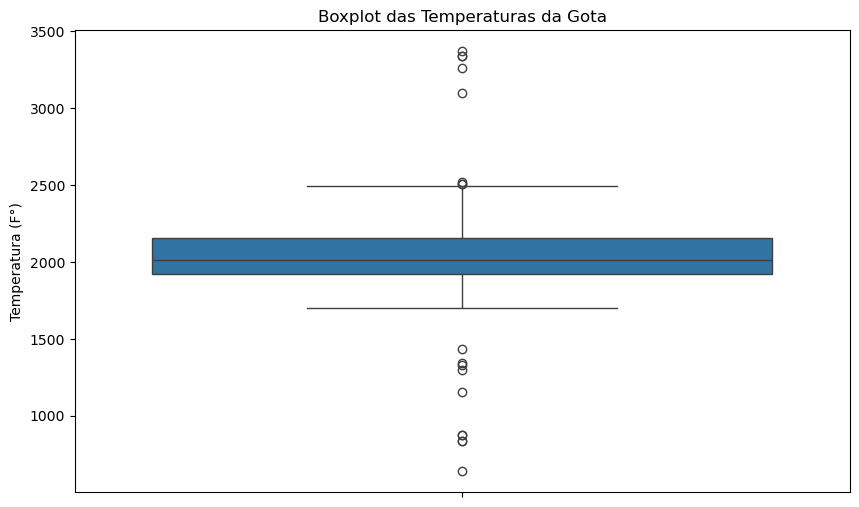

In [465]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(
    y=df_valores_mensais['Temperatura (F°)']
)

plt.title('Boxplot das Temperaturas da Gota')
plt.ylabel('Temperatura (F°)')

plt.show()
px.scatter(data_frame=df_valores_mensais, x=df_valores_mensais['Data de prod'], y=df_valores_mensais['Diferença Frente-Gota'], title='Diferença Frente-Gota')

### Dias com Diferença Negativa

In [466]:
dias_diferenca_negativa = df_valores_mensais.loc[df_valores_mensais['Diferença Frente-Gota'] < 0, ['Data de prod', 'Ordem de prod', 'Frente-PV (F°)', 'Temperatura (F°)', 'Diferença Frente-Gota']]

px.scatter(data_frame=dias_diferenca_negativa, x=dias_diferenca_negativa['Data de prod'], y=dias_diferenca_negativa['Diferença Frente-Gota'], title='Datas com Diferença Frente-Gota Negativa')

### Analisando os outliers

In [467]:
colunas_gota = ['Ordem de prod', 'Data de prod', 'Temperatura (F°)', 'Frente-PV (F°)', 'Diferença Frente-Gota', 'Gotas cortadas (toneladas)', 'Peso médio (g)', 'Cortes por minuto', 'Comprimento médio (mm)', 'Diâmetro']

df_valores_mensais.loc[df_valores_mensais['Diferença Frente-Gota'] <= -800, colunas_gota]

,Ordem de prod,Data de prod,Temperatura (F°),Frente-PV (F°),Diferença Frente-Gota,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro
4,192970,2024-01-04,3094.52,2173.0,-921.52,21.0216,169.7,89.0,85.6,18.1
5,192970,2024-01-05,3369.74,2175.0,-1194.74,21.4492,173.6,86.0,140.5,32.9
6,192970,2024-01-06,3335.18,2175.5,-1159.68,21.5256,170.2,86.0,144.7,32.7
7,192970,2024-01-07,3340.94,2177.0,-1163.94,21.4387,171.7,86.7,141.5,30.2
190,194057,2024-06-21,3257.24,2115.3,-1141.94,22.1942,168.5,87.4,29.3,15.9


# Trabalhando com Database de Qualidade

In [468]:
dados_qualidade = pd.read_excel(
    './dados/Extração B1_Peso+Velocidade_Analise.xlsx', 
    sheet_name='LossesAndOutputs', 
    header=0, 
    index_col=[0, 1, 2]  
)

dados_qualidade.rename(columns={'Unnamed: 2': 'Data'}, inplace=True)

dados_qualidade

Empac.-reescol.  Empacotado  Entra. do recozi.  \
B1    192970 2024-01-03           1.6948      1.6948            12.2051   
             2024-01-04           6.9028      6.9028            16.1446   
             2024-01-05           6.2779      6.2779            16.8795   
             2024-01-06           7.9480      7.9480            17.3240   
             2024-01-07           4.5498      4.5498            14.5250   
             2024-01-08          11.7513     11.7513            19.5315   
             2024-01-09          11.7991     11.7991            18.4374   
             2024-01-10          11.0273     11.0273            18.1368   
             2024-01-11           3.1466      3.1466             6.7617   
      Total  2024-01-11          65.0976     65.0976           139.9456   
      193112 2024-01-01          14.5165     14.5165            20.3353   
             2024-01-02          14.8343     14.8343            20.6406   
             2024-01-03           0.7067      0.7067             0.8504   
      Total  2024-01-03          30.0575     30.0575            41.8263   
      193164 2024-01-11           3.4612      3.4612             7.3959   
             2024-01-12          12.5454     12.5454            18.4572   
             2024-01-13          10.7895     10.7895            15.5705   
             2024-01-14          13.3980     13.3980            18.5158   
             2024-01-15          12.6431     12.6431            18.2183   
             2024-01-16          13.3544     13.3544            18.8488   
             2024-01-17          15.0068     15.0068            19.5092   
             2024-01-18          15.0169     15.0169            19.1175   
             2024-01-19          12.0574     12.0574            17.4100   
             2024-01-20          13.3491     13.3491            19.0989   
             2024-01-21          14.8158     14.8158            19.1612   
             2024-01-22          13.0427     13.0427            18.8733   
             2024-01-23           1.6585      1.6585             1.7541   
             2024-01-24           0.0000      0.0000             0.0000   
      Total  2024-01-24         151.1388    151.1388           211.9307   
      193206 2024-01-24           0.0000      0.0000             0.0000   
             2024-01-25           4.1109      4.1109            13.6606   
             2024-01-26          11.5933     11.5933            19.0055   
             2024-01-27          11.4307     11.4307            19.9182   
             2024-01-28           3.5475      3.5475             6.7768   
      Total  2024-01-28          30.6824     30.6824            59.3611   
      193207 2024-01-28           1.2759      1.2759             6.2237   
             2024-01-29           4.1009      4.1009             9.6603   
             2024-01-30           5.4854      5.4854            10.6626   
             2024-01-31           6.8520      6.8520            13.1953   
      Total  2024-01-31          17.7142     17.7142            39.7419   
Total Total  2024-01-31         294.6905    294.6905           492.8056   
             2024-01-31         294.6905    294.6905           492.8056   

                         Entrada AF  Frascos aprovados  Frascos produzidos  \
B1    192970 2024-01-03      8.5257             1.0671              1.6948   
             2024-01-04     13.9903             6.7325              6.9028   
             2024-01-05     12.3638             6.4151              6.2779   
             2024-01-06     15.2663             7.8450              7.9480   
             2024-01-07     10.3543             4.2588              4.5498   
             2024-01-08     17.9165            10.6915             11.7513   
             2024-01-09     15.7430            11.3895             11.7991   
             2024-01-10     15.6171            10.9916             11.0273   
             2024-01-11      5.7997             2.1306              3.1466   
      Total  2024-0

### Redimensionando tabela

In [469]:
dados_sem_totais = dados_qualidade[dados_qualidade.index.get_level_values(1) != "Total"]

dados_totais = dados_qualidade[dados_qualidade.index.get_level_values(1) == "Total"]

dados_formatados = dados_sem_totais.reset_index()
dados_totais_reset = dados_totais.reset_index()

dados_formatados.rename(columns={'level_0': 'Maquina', 'level_1': 'Ordem', 'level_2': 'Data'}, inplace=True)
dados_formatados

,Maquina,Ordem,Data,Empac.-reescol.,Empacotado,Entra. do recozi.,Entrada AF,Frascos aprovados,Frascos produzidos,Frascos reprovados,...,Recozi.,Reescolhido,Rej. Argos,Rej. aut.,Rej. Emhart,Rej. EVO NEO,Tot. rej. esc. aut.,Total parada seção,Total Rej. AF,Transferência AQ
0,B1,192970,2024-01-03,1.6948,1.6948,12.2051,8.5257,1.0671,1.6948,0.3564,...,111.5911,0,1.6118,0,0,3.1621,4.7740,0,6.8309,8.7433
1,B1,192970,2024-01-04,6.9028,6.9028,16.1446,13.9903,6.7325,6.9028,0.0000,...,109.9592,0,1.0592,0,0,3.0289,4.0881,0,7.0875,4.8770
2,B1,192970,2024-01-05,6.2779,6.2779,16.8795,12.3638,6.4151,6.2779,0.0000,...,109.9308,0,1.0322,0,0,3.0409,4.0730,0,6.0859,4.5696
3,B1,192970,2024-01-06,7.9480,7.9480,17.3240,15.2663,7.8450,7.9480,0.0000,...,110.3116,0,2.0806,0,0,4.0214,6.1020,0,7.3183,4.2016
4,B1,192970,2024-01-07,4.5498,4.5498,14.5250,10.3543,4.2588,4.5498,0.3549,...,109.7947,0,0.7333,0,0,1.8965,2.6298,0,5.8045,6.9136
5,B1,192970,2024-01-08,11.7513,11.7513,19.5315,17.9165,10.6915,11.7513,0.7098,...,101.5342,0,1.3445,0,0,2.2614,3.6059,0,6.1652,1.9749
6,B1,192970,2024-01-09,11.7991,11.7991,18.4374,15.7430,11.3895,11.7991,0.3564,...,98.7199,0,0.9198,0,0,1.4145,2.3343,0,3.9439,3.0861
7,B1,192970,2024-01-10,11.0273,11.0273,18.1368,15.6171,10.9916,11.0273,0.0000,...,98.2733,0,1.1014,0,0,1.7418,2.8432,0,4.5898,3.2898
8,B1,192970,2024-01-11,3.1466,3.1466,6.7617,5.7997,2.1306,3.1466,1.0659,...,36.4425,0,0.5601,0,0,1.1267,1.6868,0,2.6531,1.1851
9,B1,193112,2024-01-01,14.5165,14.5165,20.3353,19.5466,12.9457,14.5165,0.0000,...,111.9245,0,1.4490,0,0,0.7372,2.1862,0,5.0300,1.5552


In [470]:
colunas_qualidade = dados_formatados.columns[3:].tolist()
colunas_qualidade

['Empac.-reescol.',
 'Empacotado',
 'Entra. do recozi.',
 'Entrada AF',
 'Frascos aprovados',
 'Frascos produzidos',
 'Frascos reprovados',
 'Gotas cortadas',
 'Paletes aprovados',
 'Paletes reprovados',
 'Perdas AQ',
 'Perdas recozi.',
 'Recozi.',
 'Reescolhido',
 'Rej. Argos',
 'Rej. aut.',
 'Rej. Emhart',
 'Rej. EVO NEO',
 'Tot. rej. esc. aut.',
 'Total parada seção',
 'Total Rej. AF',
 'Transferência AQ']

### Agrupando multi-index sem linhas de total

In [471]:
dados_formatados = dados_formatados.set_index(['Maquina', 'Ordem', 'Data'])
dados_formatados

Empac.-reescol.  Empacotado  Entra. do recozi.  \
Maquina Ordem  Data                                                         
B1      192970 2024-01-03           1.6948      1.6948            12.2051   
               2024-01-04           6.9028      6.9028            16.1446   
               2024-01-05           6.2779      6.2779            16.8795   
               2024-01-06           7.9480      7.9480            17.3240   
               2024-01-07           4.5498      4.5498            14.5250   
               2024-01-08          11.7513     11.7513            19.5315   
               2024-01-09          11.7991     11.7991            18.4374   
               2024-01-10          11.0273     11.0273            18.1368   
               2024-01-11           3.1466      3.1466             6.7617   
        193112 2024-01-01          14.5165     14.5165            20.3353   
               2024-01-02          14.8343     14.8343            20.6406   
               2024-01-03           0.7067      0.7067             0.8504   
        193164 2024-01-11           3.4612      3.4612             7.3959   
               2024-01-12          12.5454     12.5454            18.4572   
               2024-01-13          10.7895     10.7895            15.5705   
               2024-01-14          13.3980     13.3980            18.5158   
               2024-01-15          12.6431     12.6431            18.2183   
               2024-01-16          13.3544     13.3544            18.8488   
               2024-01-17          15.0068     15.0068            19.5092   
               2024-01-18          15.0169     15.0169            19.1175   
               2024-01-19          12.0574     12.0574            17.4100   
               2024-01-20          13.3491     13.3491            19.0989   
               2024-01-21          14.8158     14.8158            19.1612   
               2024-01-22          13.0427     13.0427            18.8733   
               2024-01-23           1.6585      1.6585             1.7541   
               2024-01-24           0.0000      0.0000             0.0000   
        193206 2024-01-24           0.0000      0.0000             0.0000   
               2024-01-25           4.1109      4.1109            13.6606   
               2024-01-26          11.5933     11.5933            19.0055   
               2024-01-27          11.4307     11.4307            19.9182   
               2024-01-28           3.5475      3.5475             6.7768   
        193207 2024-01-28           1.2759      1.2759             6.2237   
               2024-01-29           4.1009      4.1009             9.6603   
               2024-01-30           5.4854      5.4854            10.6626   
               2024-01-31           6.8520      6.8520            13.1953   

                           Entrada AF  Frascos aprovados  Frascos produzidos  \
Maquina Ordem  Data                                                            
B1      192970 2024-01-03      8.5257             1.0671              1.6948   
               2024-01-04     13.9903             6.7325              6.9028   
               2024-01-05     12.3638             6.4151              6.2779   
               2024-01-06     15.2663             7.8450              7.9480   
               2024-01-07     10.3543             4.2588              4.5498   
               2024-01-08     17.9165            10.6915             11.7513   
               2024-01-09     15.7430            11.3895             11.7991   
               2024-01-10     15.6171            10.9916             11.0273   
               2024-01-11      5.7997             2.1306              3.1466   
        193112 2024-01-01     19.5466            12.9457             14.5165   
               2024-01-02     19.7696            14.2299             14.8343   
               2024-01-03      0.9462             0.0000              0.7067   
        193164 2024-01-11      6.7018             3.1973 

## Trabalhando com a Ordem 192970

In [472]:
index_ordem_192970 = dados_formatados.index.get_level_values(1) == '192970'
df_qualidade_ordem_192970 = dados_formatados[index_ordem_192970]
df_qualidade_ordem_192970

Empac.-reescol.  Empacotado  Entra. do recozi.  \
Maquina Ordem  Data                                                         
B1      192970 2024-01-03           1.6948      1.6948            12.2051   
               2024-01-04           6.9028      6.9028            16.1446   
               2024-01-05           6.2779      6.2779            16.8795   
               2024-01-06           7.9480      7.9480            17.3240   
               2024-01-07           4.5498      4.5498            14.5250   
               2024-01-08          11.7513     11.7513            19.5315   
               2024-01-09          11.7991     11.7991            18.4374   
               2024-01-10          11.0273     11.0273            18.1368   
               2024-01-11           3.1466      3.1466             6.7617   

                           Entrada AF  Frascos aprovados  Frascos produzidos  \
Maquina Ordem  Data                                                            
B1      192970 2024-01-03      8.5257             1.0671              1.6948   
               2024-01-04     13.9903             6.7325              6.9028   
               2024-01-05     12.3638             6.4151              6.2779   
               2024-01-06     15.2663             7.8450              7.9480   
               2024-01-07     10.3543             4.2588              4.5498   
               2024-01-08     17.9165            10.6915             11.7513   
               2024-01-09     15.7430            11.3895             11.7991   
               2024-01-10     15.6171            10.9916             11.0273   
               2024-01-11      5.7997             2.1306              3.1466   

                           Frascos reprovados  Gotas cortadas  \
Maquina Ordem  Data                                             
B1      192970 2024-01-03              0.3564         20.9484   
               2024-01-04              0.0000         21.0216   
               2024-01-05              0.0000         21.4492   
               2024-01-06              0.0000         21.5256   
               2024-01-07              0.3549         21.4387   
               2024-01-08              0.7098         21.5064   
               2024-01-09              0.3564         21.5235   
               2024-01-10              0.0000         21.4267   
               2024-01-11              1.0659          7.9468   

                           Paletes aprovados  Paletes reprovados  ...  \
Maquina Ordem  Data                                               ...   
B1      192970 2024-01-03             0.0005              0.0002  ...   
               2024-01-04             0.0032              0.0000  ...   
               2024-01-05             0.0030              0.0000  ...   
               2024-01-06             0.0037              0.0000  ...   
               2024-01-07             0.0020              0.0002  ...   
               2024-01-08             0.0051              0.0003  ...   
               2024-01-09             0.0054              0.0002  ...   
               2024-01-10             0.0052              0.0000  ...   
               2024-01-11             0.0010              0.0005  ...   

                            Recozi.  Reescolhido  Rej. Argos  Rej. aut.  \
Maquina Ordem  Data                                                       
B1      192970 2024-01-03  111.5911            0      1.6118          0   
               2024-01-04  109.9592            0      1.0592          0   
               2024-01-05  109.9308            0      1.0322          0   
               2024-01-06  110.3116            0      2.0806          0   
               2024-01-07  109.7947            0      0.7333          0   
               2024-01-08  101.5342            0      1.3445          0   
               2024-01-09   98.7199            0      0.9198          0   
               2024-01-10   98.2733            0      1.1014          0   
               2024-01-11   

In [473]:
df_gotas_ordem_192970 = df_valores_mensais.loc[df_valores_mensais['Ordem de prod'] == '192970', colunas_gota]
df_gotas_ordem_192970

,Ordem de prod,Data de prod,Temperatura (F°),Frente-PV (F°),Diferença Frente-Gota,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro
3,192970,2024-01-03,2505.02,2176.4,-328.62,20.9484,169.3,90.0,110.4,32.5
4,192970,2024-01-04,3094.52,2173.0,-921.52,21.0216,169.7,89.0,85.6,18.1
5,192970,2024-01-05,3369.74,2175.0,-1194.74,21.4492,173.6,86.0,140.5,32.9
6,192970,2024-01-06,3335.18,2175.5,-1159.68,21.5256,170.2,86.0,144.7,32.7
7,192970,2024-01-07,3340.94,2177.0,-1163.94,21.4387,171.7,86.7,141.5,30.2
8,192970,2024-01-08,2519.24,2177.0,-342.24,21.5064,166.5,87.8,140.6,32.5
9,192970,2024-01-09,1901.48,2177.0,275.52,21.5235,169.6,88.0,128.4,32.9
10,192970,2024-01-10,1921.64,2177.0,255.36,21.4267,169.4,88.0,127.0,33.0
12,192970,2024-01-11,1975.28,2177.0,201.72,7.9468,169.2,84.5,110.9,33.9


### Merge dos DataFrames

In [474]:
qualidade_ordem_192970_reset = df_qualidade_ordem_192970.reset_index()

df_combinado_192970 = pd.merge(
    qualidade_ordem_192970_reset, 
    df_gotas_ordem_192970, 
    left_on=['Ordem', 'Data'],
    right_on=['Ordem de prod', 'Data de prod'],
    how='inner'
)

In [475]:
df_combinado_192970.drop(columns={'Ordem de prod', 'Data de prod'}, inplace=True)

In [476]:
df_combinado_192970.isna()

,Maquina,Ordem,Data,Empac.-reescol.,Empacotado,Entra. do recozi.,Entrada AF,Frascos aprovados,Frascos produzidos,Frascos reprovados,...,Total Rej. AF,Transferência AQ,Temperatura (F°),Frente-PV (F°),Diferença Frente-Gota,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [477]:
df_combinado_192970

,Maquina,Ordem,Data,Empac.-reescol.,Empacotado,Entra. do recozi.,Entrada AF,Frascos aprovados,Frascos produzidos,Frascos reprovados,...,Total Rej. AF,Transferência AQ,Temperatura (F°),Frente-PV (F°),Diferença Frente-Gota,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro
0,B1,192970,2024-01-03,1.6948,1.6948,12.2051,8.5257,1.0671,1.6948,0.3564,...,6.8309,8.7433,2505.02,2176.4,-328.62,20.9484,169.3,90.0,110.4,32.5
1,B1,192970,2024-01-04,6.9028,6.9028,16.1446,13.9903,6.7325,6.9028,0.0000,...,7.0875,4.8770,3094.52,2173.0,-921.52,21.0216,169.7,89.0,85.6,18.1
2,B1,192970,2024-01-05,6.2779,6.2779,16.8795,12.3638,6.4151,6.2779,0.0000,...,6.0859,4.5696,3369.74,2175.0,-1194.74,21.4492,173.6,86.0,140.5,32.9
3,B1,192970,2024-01-06,7.9480,7.9480,17.3240,15.2663,7.8450,7.9480,0.0000,...,7.3183,4.2016,3335.18,2175.5,-1159.68,21.5256,170.2,86.0,144.7,32.7
4,B1,192970,2024-01-07,4.5498,4.5498,14.5250,10.3543,4.2588,4.5498,0.3549,...,5.8045,6.9136,3340.94,2177.0,-1163.94,21.4387,171.7,86.7,141.5,30.2
5,B1,192970,2024-01-08,11.7513,11.7513,19.5315,17.9165,10.6915,11.7513,0.7098,...,6.1652,1.9749,2519.24,2177.0,-342.24,21.5064,166.5,87.8,140.6,32.5
6,B1,192970,2024-01-09,11.7991,11.7991,18.4374,15.7430,11.3895,11.7991,0.3564,...,3.9439,3.0861,1901.48,2177.0,275.52,21.5235,169.6,88.0,128.4,32.9
7,B1,192970,2024-01-10,11.0273,11.0273,18.1368,15.6171,10.9916,11.0273,0.0000,...,4.5898,3.2898,1921.64,2177.0,255.36,21.4267,169.4,88.0,127.0,33.0
8,B1,192970,2024-01-11,3.1466,3.1466,6.7617,5.7997,2.1306,3.1466,1.0659,...,2.6531,1.1851,1975.28,2177.0,201.72,7.9468,169.2,84.5,110.9,33.9


### Setando index

In [478]:
df_combinado_192970 = df_combinado_192970.set_index(['Maquina', 'Ordem', 'Data'])
df_combinado_192970

Empac.-reescol.  Empacotado  Entra. do recozi.  \
Maquina Ordem  Data                                                         
B1      192970 2024-01-03           1.6948      1.6948            12.2051   
               2024-01-04           6.9028      6.9028            16.1446   
               2024-01-05           6.2779      6.2779            16.8795   
               2024-01-06           7.9480      7.9480            17.3240   
               2024-01-07           4.5498      4.5498            14.5250   
               2024-01-08          11.7513     11.7513            19.5315   
               2024-01-09          11.7991     11.7991            18.4374   
               2024-01-10          11.0273     11.0273            18.1368   
               2024-01-11           3.1466      3.1466             6.7617   

                           Entrada AF  Frascos aprovados  Frascos produzidos  \
Maquina Ordem  Data                                                            
B1      192970 2024-01-03      8.5257             1.0671              1.6948   
               2024-01-04     13.9903             6.7325              6.9028   
               2024-01-05     12.3638             6.4151              6.2779   
               2024-01-06     15.2663             7.8450              7.9480   
               2024-01-07     10.3543             4.2588              4.5498   
               2024-01-08     17.9165            10.6915             11.7513   
               2024-01-09     15.7430            11.3895             11.7991   
               2024-01-10     15.6171            10.9916             11.0273   
               2024-01-11      5.7997             2.1306              3.1466   

                           Frascos reprovados  Gotas cortadas  \
Maquina Ordem  Data                                             
B1      192970 2024-01-03              0.3564         20.9484   
               2024-01-04              0.0000         21.0216   
               2024-01-05              0.0000         21.4492   
               2024-01-06              0.0000         21.5256   
               2024-01-07              0.3549         21.4387   
               2024-01-08              0.7098         21.5064   
               2024-01-09              0.3564         21.5235   
               2024-01-10              0.0000         21.4267   
               2024-01-11              1.0659          7.9468   

                           Paletes aprovados  Paletes reprovados  ...  \
Maquina Ordem  Data                                               ...   
B1      192970 2024-01-03             0.0005              0.0002  ...   
               2024-01-04             0.0032              0.0000  ...   
               2024-01-05             0.0030              0.0000  ...   
               2024-01-06             0.0037              0.0000  ...   
               2024-01-07             0.0020              0.0002  ...   
               2024-01-08             0.0051              0.0003  ...   
               2024-01-09             0.0054              0.0002  ...   
               2024-01-10             0.0052              0.0000  ...   
               2024-01-11             0.0010              0.0005  ...   

                           Total Rej. AF  Transferência AQ  Temperatura (F°)  \
Maquina Ordem  Data                                                            
B1      192970 2024-01-03         6.8309            8.7433           2505.02   
               2024-01-04         7.0875            4.8770           3094.52   
               2024-01-05         6.0859            4.5696           3369.74   
               2024-01-06         7.3183            4.2016           3335.18   
               2024-01-07         5.8045            6.9136           3340.94   
               2024-01-08         6.1652            1.9749           2519.24   
               2024-01-09         3.9439            3.0861           1901.48   
               2024-01-10         4.5898            3.2898

Comparando dados das duas tabelas

In [479]:
df_combinado_192970[['Gotas cortadas (toneladas)', 'Gotas cortadas']]

Gotas cortadas (toneladas)  Gotas cortadas
Maquina Ordem  Data                                                  
B1      192970 2024-01-03                     20.9484         20.9484
               2024-01-04                     21.0216         21.0216
               2024-01-05                     21.4492         21.4492
               2024-01-06                     21.5256         21.5256
               2024-01-07                     21.4387         21.4387
               2024-01-08                     21.5064         21.5064
               2024-01-09                     21.5235         21.5235
               2024-01-10                     21.4267         21.4267
               2024-01-11                      7.9468          7.9468

Drop nas colunas 

In [480]:
df_combinado_192970_formatado = df_combinado_192970.drop(columns={'Empac.-reescol.', 'Gotas cortadas'})

In [481]:
df_combinado_192970_formatado['Total de Perdas'] = df_combinado_192970_formatado['Gotas cortadas (toneladas)'] - df_combinado_192970_formatado['Empacotado']
df_combinado_192970_formatado.columns

Index(['Empacotado', 'Entra. do recozi.', 'Entrada AF', 'Frascos aprovados',
       'Frascos produzidos', 'Frascos reprovados', 'Paletes aprovados',
       'Paletes reprovados', 'Perdas AQ', 'Perdas recozi.', 'Recozi.',
       'Reescolhido', 'Rej. Argos', 'Rej. aut.', 'Rej. Emhart', 'Rej. EVO NEO',
       'Tot. rej. esc. aut.', 'Total parada seção', 'Total Rej. AF',
       'Transferência AQ', 'Temperatura (F°)', 'Frente-PV (F°)',
       'Diferença Frente-Gota', 'Gotas cortadas (toneladas)', 'Peso médio (g)',
       'Cortes por minuto', 'Comprimento médio (mm)', 'Diâmetro',
       'Total de Perdas'],
      dtype='object')

### Criando Dataframe formatado

In [482]:
df_combinado_192970_formatado = df_combinado_192970_formatado[['Gotas cortadas (toneladas)', 'Perdas AQ', 'Entra. do recozi.', 'Perdas recozi.' , 'Entrada AF', 'Total Rej. AF', 'Empacotado', 'Total de Perdas', 'Temperatura (F°)', 'Frente-PV (F°)', 'Diferença Frente-Gota', 'Peso médio (g)', 'Cortes por minuto', 'Comprimento médio (mm)',
       'Diâmetro']]

df_combinado_192970_formatado.to_excel('df_combinado_192970_formatado.xlsx', engine='openpyxl')
display(df_combinado_192970_formatado)

Gotas cortadas (toneladas)  Perdas AQ  \
Maquina Ordem  Data                                                
B1      192970 2024-01-03                     20.9484     8.7433   
               2024-01-04                     21.0216     4.8770   
               2024-01-05                     21.4492     4.5696   
               2024-01-06                     21.5256     4.2016   
               2024-01-07                     21.4387     6.9136   
               2024-01-08                     21.5064     1.9749   
               2024-01-09                     21.5235     3.0861   
               2024-01-10                     21.4267     3.2898   
               2024-01-11                      7.9468     1.1851   

                           Entra. do recozi.  Perdas recozi.  Entrada AF  \
Maquina Ordem  Data                                                        
B1      192970 2024-01-03            12.2051          3.6794      8.5257   
               2024-01-04            16.1446          2.1543     13.9903   
               2024-01-05            16.8795          4.5158     12.3638   
               2024-01-06            17.3240          2.0577     15.2663   
               2024-01-07            14.5250          4.1708     10.3543   
               2024-01-08            19.5315          1.6150     17.9165   
               2024-01-09            18.4374          2.6943     15.7430   
               2024-01-10            18.1368          2.5197     15.6171   
               2024-01-11             6.7617          0.9620      5.7997   

                           Total Rej. AF  Empacotado  Total de Perdas  \
Maquina Ordem  Data                                                     
B1      192970 2024-01-03         6.8309      1.6948          19.2536   
               2024-01-04         7.0875      6.9028          14.1188   
               2024-01-05         6.0859      6.2779          15.1713   
               2024-01-06         7.3183      7.9480          13.5776   
               2024-01-07         5.8045      4.5498          16.8889   
               2024-01-08         6.1652     11.7513           9.7551   
               2024-01-09         3.9439     11.7991           9.7244   
               2024-01-10         4.5898     11.0273          10.3994   
               2024-01-11         2.6531      3.1466           4.8002   

                           Temperatura (F°)  Frente-PV (F°)  \
Maquina Ordem  Data                                           
B1      192970 2024-01-03           2505.02          2176.4   
               2024-01-04           3094.52          2173.0   
               2024-01-05           3369.74          2175.0   
               2024-01-06           3335.18          2175.5   
               2024-01-07           3340.94          2177.0   
               2024-01-08           2519.24          2177.0   
               2024-01-09           1901.48          2177.0   
               2024-01-10           1921.64          2177.0   
               2024-01-11           1975.28          2177.0   

                           Diferença Frente-Gota  Peso médio (g)  \
Maquina Ordem  Data                                                
B1      192970 2024-01-03                -328.62           169.3   
               2024-01-04                -921.52           169.7   
               2024-01-05               -1194.74           173.6   
               2024-01-06               -1159.68           170.2   
               2024-01-07               -1163.94           171.7   
               2024-01-08                -342.24           166.5   
               2024-01-09                 275.52           169.6   
               2024-01-10                 255.36           169.4   
               2024-01-11                 201.72           169.2   

                           Cortes por minuto  Comprimento médio (mm)  Diâmetro  
Maquina Ordem  Data                                                             
B1      192970 2024-01-03       

In [483]:
colunas_caracteristicas = ['Temperatura (F°)',
       'Diferença Frente-Gota', 'Gotas cortadas (toneladas)', 'Peso médio (g)',
       'Cortes por minuto', 'Comprimento médio (mm)', 'Diâmetro']

df_caracteristicas = df_combinado_192970_formatado[colunas_caracteristicas].reset_index()

for col in colunas_caracteristicas:
    fig = px.line(
        df_caracteristicas,
        x='Data',
        y=col,
        title=f'Variação de {col} ao Longo das Datas',
        labels={'Data': 'Data', col: col}
    )
    
    fig.update_layout(
        title_font=dict(size=20)
    )
    
    fig.show()

In [484]:
df_combinado_reset = df_combinado_192970_formatado.reset_index()

df_linha_50 = df_combinado_reset[['Data', 'Gotas cortadas (toneladas)']].copy()
df_linha_50['Linha 50%'] = df_linha_50['Gotas cortadas (toneladas)'] * 0.5

fig = px.line(
    df_combinado_reset,
    x='Data',
    y='Total de Perdas',
    title='Variação de Total de Perdas ao Longo das Datas',
    labels={'Data': 'Data', 'Total de Perdas': 'Total de Perdas'}
)

fig.add_scatter(
    x=df_linha_50['Data'],
    y=df_linha_50['Linha 50%'],
    mode='lines',
    name='50% de Gotas Cortadas (Toneladas)',
    line=dict(dash='dash', color='red')
)

fig.update_layout(
    title_font=dict(size=20)
)

fig.show()

In [485]:
df_correlacao_192970 = df_combinado_192970_formatado[['Gotas cortadas (toneladas)', 'Perdas AQ', 'Entra. do recozi.',
                                               'Perdas recozi.', 'Entrada AF', 'Total Rej. AF', 'Empacotado',
                                               'Total de Perdas', 'Temperatura (F°)', 'Frente-PV (F°)', 
                                               'Diferença Frente-Gota', 'Peso médio (g)', 'Cortes por minuto', 
                                               'Comprimento médio (mm)', 'Diâmetro']]

correlacao = df_correlacao_192970.corr()

fig = px.imshow(correlacao,
                labels=dict(x="Variáveis", y="Variáveis", color="Correlação"),
                x=correlacao.columns,
                y=correlacao.columns,
                title="Heatmap de Correlação entre Variáveis",
                width=800, 
                height=800,
                color_continuous_scale='RdBu_r')

fig.show()

In [486]:
df_temp_perdas = df_combinado_192970_formatado[['Temperatura (F°)', 'Total Rej. AF']].reset_index()

fig_temp_perdas = px.scatter(df_temp_perdas, 
                 x='Temperatura (F°)', 
                 y='Total Rej. AF',
                 size='Total Rej. AF',
                 color='Temperatura (F°)',
                 title='Relação entre Temperatura (F°) e Total Rej. AF')

fig_temp_perdas.update_layout(xaxis_type="log", yaxis_type="log")

fig_temp_perdas.show()

In [487]:
df_medidas_perdas = df_combinado_192970_formatado.reset_index()

fig1 = px.scatter(df_medidas_perdas, 
                  x='Peso médio (g)', 
                  y='Total de Perdas', 
                  title='Relação entre Peso Médio (g) e Total de Perdas (toneladas)',
                  labels={'Peso médio (g)': 'Peso Médio (g)', 'Total de Perdas': 'Total de Perdas (toneladas)'},
                  size='Total de Perdas',
                  color='Total de Perdas')

fig2 = px.scatter(df_medidas_perdas, 
                  x='Comprimento médio (mm)', 
                  y='Total de Perdas', 
                  title='Relação entre Comprimento Médio (mm) e Total de Perdas (toneladas)',
                  labels={'Comprimento médio (mm)': 'Comprimento Médio (mm)', 'Total de Perdas': 'Total de Perdas (toneladas)'},
                  size='Total de Perdas',
                  color='Total de Perdas')

fig3 = px.scatter(df_medidas_perdas, 
                  x='Diâmetro', 
                  y='Total de Perdas', 
                  title='Relação entre Diâmetro e Total de Perdas (toneladas)',
                  labels={'Diâmetro': 'Diâmetro', 'Total de Perdas': 'Total de Perdas (toneladas)'},
                  size='Total de Perdas',
                  color='Total de Perdas')

fig1.show()
fig2.show()
fig3.show()

# Problema:

- A análise revelou que as características dos frascos influenciam o total de perdas diárias, permitindo identificar padrões que otimizam a produtividade e minimizam desperdícios.

- A diferença de temperatura não exerce uma influência significativa nos resultados esperados. Esse comportamento pode ser atribuído a possíveis erros de monitoramento. 


# Solução: 

## Repetir o comportamento do dia 2024-01-09

** Para ordens semelhantes á ordem 192970

#### Recebe a nova ordem: 
O modelo pega as características da nova ordem.


#### Rotula e agrupa a nova ordem: 
O modelo utiliza a clusterização para identificar o grupo ao qual a nova ordem pertence, com base nas características dos frascos.


#### Identifica a produtividade do grupo: 
A nova ordem será associada à produtividade média ou ao dia mais produtivo do grupo de ordens semelhantes.

#### Retorna a produtividade e recomendações: 
O modelo retorna a probabilidade de alta produtividade para a nova ordem e sugere recomendações baseadas nas características do dia mais produtivo de cada ordem:

- Ajustes nas máquinas.
- Ajustes nas características das gotas.
- Ajustes nos valores de temperatura.
- Identificação de possíveis erros ou anomalias.

In [488]:
df_valores_mensais[df_valores_mensais['Data de prod'] == '2024-01-09'].drop(columns={'Dia', 'Mês'})

,Linha de prod,Ordem de prod,Data de prod,Gotas cortadas (toneladas),Peso médio (g),Cortes por minuto,Comprimento médio (mm),Diâmetro,Temperatura (F°),Tras-PV (F°),Fritas-PV (F°),Agit-PV (F°),Meio-PV (F°),Frente-PV (F°),Diferença Tras-Fritas,Diferença Fritas-Agit,Diferença Agit-Meio,Diferença Meio-Frente,Diferença Frente-Gota
9,B1,192970,2024-01-09,21.5235,169.6,88.0,128.4,32.9,1901.48,2350.0,2300.0,2250.0,2210.0,2177.0,50.0,50.0,40.0,33.0,275.52


# Refatorando Solução: Um novo começo

In [489]:
dados_formatados

Empac.-reescol.  Empacotado  Entra. do recozi.  \
Maquina Ordem  Data                                                         
B1      192970 2024-01-03           1.6948      1.6948            12.2051   
               2024-01-04           6.9028      6.9028            16.1446   
               2024-01-05           6.2779      6.2779            16.8795   
               2024-01-06           7.9480      7.9480            17.3240   
               2024-01-07           4.5498      4.5498            14.5250   
               2024-01-08          11.7513     11.7513            19.5315   
               2024-01-09          11.7991     11.7991            18.4374   
               2024-01-10          11.0273     11.0273            18.1368   
               2024-01-11           3.1466      3.1466             6.7617   
        193112 2024-01-01          14.5165     14.5165            20.3353   
               2024-01-02          14.8343     14.8343            20.6406   
               2024-01-03           0.7067      0.7067             0.8504   
        193164 2024-01-11           3.4612      3.4612             7.3959   
               2024-01-12          12.5454     12.5454            18.4572   
               2024-01-13          10.7895     10.7895            15.5705   
               2024-01-14          13.3980     13.3980            18.5158   
               2024-01-15          12.6431     12.6431            18.2183   
               2024-01-16          13.3544     13.3544            18.8488   
               2024-01-17          15.0068     15.0068            19.5092   
               2024-01-18          15.0169     15.0169            19.1175   
               2024-01-19          12.0574     12.0574            17.4100   
               2024-01-20          13.3491     13.3491            19.0989   
               2024-01-21          14.8158     14.8158            19.1612   
               2024-01-22          13.0427     13.0427            18.8733   
               2024-01-23           1.6585      1.6585             1.7541   
               2024-01-24           0.0000      0.0000             0.0000   
        193206 2024-01-24           0.0000      0.0000             0.0000   
               2024-01-25           4.1109      4.1109            13.6606   
               2024-01-26          11.5933     11.5933            19.0055   
               2024-01-27          11.4307     11.4307            19.9182   
               2024-01-28           3.5475      3.5475             6.7768   
        193207 2024-01-28           1.2759      1.2759             6.2237   
               2024-01-29           4.1009      4.1009             9.6603   
               2024-01-30           5.4854      5.4854            10.6626   
               2024-01-31           6.8520      6.8520            13.1953   

                           Entrada AF  Frascos aprovados  Frascos produzidos  \
Maquina Ordem  Data                                                            
B1      192970 2024-01-03      8.5257             1.0671              1.6948   
               2024-01-04     13.9903             6.7325              6.9028   
               2024-01-05     12.3638             6.4151              6.2779   
               2024-01-06     15.2663             7.8450              7.9480   
               2024-01-07     10.3543             4.2588              4.5498   
               2024-01-08     17.9165            10.6915             11.7513   
               2024-01-09     15.7430            11.3895             11.7991   
               2024-01-10     15.6171            10.9916             11.0273   
               2024-01-11      5.7997             2.1306              3.1466   
        193112 2024-01-01     19.5466            12.9457             14.5165   
               2024-01-02     19.7696            14.2299             14.8343   
               2024-01-03      0.9462             0.0000              0.7067   
        193164 2024-01-11      6.7018             3.1973 

In [490]:
df_gotas_janeiro = df_valores_mensais[
    (df_valores_mensais['Mês'] == 1) 
]

df_gotas_janeiro[['Ordem de prod']].drop_duplicates()

,Ordem de prod
0,193112
3,192970
11,193164
24,193206
27,193207


In [491]:
df_gotas_janeiro = df_gotas_janeiro.reset_index(drop=True)

df_combinado_janeiro = pd.merge(
    dados_formatados,
    df_gotas_janeiro,
    left_on=['Ordem', 'Data'],
    right_on=['Ordem de prod', 'Data de prod'],
    how='inner'
)

df_combinado_janeiro = df_combinado_janeiro.set_index(['Ordem de prod', 'Data de prod'])

In [492]:
df_combinado_janeiro

Empac.-reescol.  Empacotado  Entra. do recozi.  \
Ordem de prod Data de prod                                                   
192970        2024-01-03             1.6948      1.6948            12.2051   
              2024-01-04             6.9028      6.9028            16.1446   
              2024-01-05             6.2779      6.2779            16.8795   
              2024-01-06             7.9480      7.9480            17.3240   
              2024-01-07             4.5498      4.5498            14.5250   
              2024-01-08            11.7513     11.7513            19.5315   
              2024-01-09            11.7991     11.7991            18.4374   
              2024-01-10            11.0273     11.0273            18.1368   
              2024-01-11             3.1466      3.1466             6.7617   
193112        2024-01-01            14.5165     14.5165            20.3353   
              2024-01-02            14.8343     14.8343            20.6406   
              2024-01-03             0.7067      0.7067             0.8504   
193164        2024-01-11             3.4612      3.4612             7.3959   
              2024-01-12            12.5454     12.5454            18.4572   
              2024-01-13            10.7895     10.7895            15.5705   
              2024-01-14            13.3980     13.3980            18.5158   
              2024-01-15            12.6431     12.6431            18.2183   
              2024-01-16            13.3544     13.3544            18.8488   
              2024-01-17            15.0068     15.0068            19.5092   
              2024-01-18            15.0169     15.0169            19.1175   
              2024-01-19            12.0574     12.0574            17.4100   
              2024-01-20            13.3491     13.3491            19.0989   
              2024-01-21            14.8158     14.8158            19.1612   
              2024-01-22            13.0427     13.0427            18.8733   
193206        2024-01-25             4.1109      4.1109            13.6606   
              2024-01-26            11.5933     11.5933            19.0055   
              2024-01-27            11.4307     11.4307            19.9182   
              2024-01-28             3.5475      3.5475             6.7768   
193207        2024-01-28             1.2759      1.2759             6.2237   
              2024-01-29             4.1009      4.1009             9.6603   
              2024-01-30             5.4854      5.4854            10.6626   
              2024-01-31             6.8520      6.8520            13.1953   

                            Entrada AF  Frascos aprovados  Frascos produzidos  \
Ordem de prod Data de prod                                                      
192970        2024-01-03        8.5257             1.0671              1.6948   
              2024-01-04       13.9903             6.7325              6.9028   
              2024-01-05       12.3638             6.4151              6.2779   
              2024-01-06       15.2663             7.8450              7.9480   
              2024-01-07       10.3543             4.2588              4.5498   
              2024-01-08       17.9165            10.6915             11.7513   
              2024-01-09       15.7430            11.3895             11.7991   
              2024-01-10       15.6171            10.9916             11.0273   
              2024-01-11        5.7997             2.1306              3.1466   
193112        2024-01-01       19.5466            12.9457             14.5165   
              2024-01-02       19.7696            14.2299             14.8343   
              2024-01-03        0.9462             0.0000              0.7067   
193164        2024-01-11        6.7018             3.1973              3.4612   
              2024-01-12       16.4558            11.7233             12.5454   
              2024-01-13       14.5391             9.5820             10.7895  

In [493]:
df_combinado_janeiro.columns

Index(['Empac.-reescol.', 'Empacotado', 'Entra. do recozi.', 'Entrada AF',
       'Frascos aprovados', 'Frascos produzidos', 'Frascos reprovados',
       'Gotas cortadas', 'Paletes aprovados', 'Paletes reprovados',
       'Perdas AQ', 'Perdas recozi.', 'Recozi.', 'Reescolhido', 'Rej. Argos',
       'Rej. aut.', 'Rej. Emhart', 'Rej. EVO NEO', 'Tot. rej. esc. aut.',
       'Total parada seção', 'Total Rej. AF', 'Transferência AQ',
       'Linha de prod', 'Gotas cortadas (toneladas)', 'Peso médio (g)',
       'Cortes por minuto', 'Comprimento médio (mm)', 'Diâmetro',
       'Temperatura (F°)', 'Tras-PV (F°)', 'Fritas-PV (F°)', 'Agit-PV (F°)',
       'Meio-PV (F°)', 'Frente-PV (F°)', 'Dia', 'Mês', 'Diferença Tras-Fritas',
       'Diferença Fritas-Agit', 'Diferença Agit-Meio', 'Diferença Meio-Frente',
       'Diferença Frente-Gota'],
      dtype='object')

In [494]:
df_combinado_janeiro.drop(columns={'Dia', 'Mês', 'Diferença Tras-Fritas',
       'Diferença Fritas-Agit', 'Diferença Agit-Meio', 'Diferença Meio-Frente',
       'Diferença Frente-Gota', 'Gotas cortadas', 'Empac.-reescol.'}, inplace=True)

df_combinado_janeiro['Total de Perdas'] = df_combinado_janeiro['Gotas cortadas (toneladas)'] - df_combinado_janeiro['Empacotado']

In [495]:
colunas = list(df_combinado_janeiro.columns)

colunas.remove('Gotas cortadas (toneladas)')
colunas.remove('Total de Perdas')

indice_empacotado = colunas.index('Empacotado')

colunas.insert(0, 'Gotas cortadas (toneladas)')
colunas.insert(indice_empacotado + 2, 'Total de Perdas')

df_combinado_janeiro = df_combinado_janeiro[colunas]

df_combinado_janeiro.to_excel('df_combinado_janeiro.xlsx', index=True)

In [496]:
df_combinado_janeiro

Gotas cortadas (toneladas)  Empacotado  \
Ordem de prod Data de prod                                           
192970        2024-01-03                       20.9484      1.6948   
              2024-01-04                       21.0216      6.9028   
              2024-01-05                       21.4492      6.2779   
              2024-01-06                       21.5256      7.9480   
              2024-01-07                       21.4387      4.5498   
              2024-01-08                       21.5064     11.7513   
              2024-01-09                       21.5235     11.7991   
              2024-01-10                       21.4267     11.0273   
              2024-01-11                        7.9468      3.1466   
193112        2024-01-01                       21.8905     14.5165   
              2024-01-02                       21.8574     14.8343   
              2024-01-03                        0.9849      0.7067   
193164        2024-01-11                       12.4944      3.4612   
              2024-01-12                       20.0448     12.5454   
              2024-01-13                       20.2870     10.7895   
              2024-01-14                       20.1206     13.3980   
              2024-01-15                       20.2607     12.6431   
              2024-01-16                       20.4030     13.3544   
              2024-01-17                       20.3996     15.0068   
              2024-01-18                       20.4293     15.0169   
              2024-01-19                       20.4644     12.0574   
              2024-01-20                       20.3529     13.3491   
              2024-01-21                       20.4216     14.8158   
              2024-01-22                       20.4466     13.0427   
193206        2024-01-25                       22.4059      4.1109   
              2024-01-26                       21.2259     11.5933   
              2024-01-27                       22.0823     11.4307   
              2024-01-28                        8.5983      3.5475   
193207        2024-01-28                        8.8231      1.2759   
              2024-01-29                       14.7408      4.1009   
              2024-01-30                       14.6850      5.4854   
              2024-01-31                       14.8511      6.8520   

                            Total de Perdas  Entra. do recozi.  Entrada AF  \
Ordem de prod Data de prod                                                   
192970        2024-01-03            19.2536            12.2051      8.5257   
              2024-01-04            14.1188            16.1446     13.9903   
              2024-01-05            15.1713            16.8795     12.3638   
              2024-01-06            13.5776            17.3240     15.2663   
              2024-01-07            16.8889            14.5250     10.3543   
              2024-01-08             9.7551            19.5315     17.9165   
              2024-01-09             9.7244            18.4374     15.7430   
              2024-01-10            10.3994            18.1368     15.6171   
              2024-01-11             4.8002             6.7617      5.7997   
193112        2024-01-01             7.3740            20.3353     19.5466   
              2024-01-02             7.0231            20.6406     19.7696   
              2024-01-03             0.2782             0.8504      0.9462   
193164        2024-01-11             9.0332             7.3959      6.7018   
              2024-01-12             7.4994            18.4572     16.4558   
              2024-01-13             9.4975            15.5705     14.5391   
              2024-01-14             6.7226            18.5158     17.5942   
              2024-01-15             7.6176            18.2183     17.3540   
              2024-01-16             7.0486            18.8488     17.7521   
              2024-01-17             5.3928            19.5092      7.9555   
         

In [497]:
df_combinado_janeiro_formatado = df_combinado_janeiro[['Gotas cortadas (toneladas)', 'Perdas AQ', 'Entra. do recozi.', 
                                                       'Perdas recozi.', 'Entrada AF', 'Rej. EVO NEO', 'Rej. Argos'
                                                       , 'Tot. rej. esc. aut.', 'Total Rej. AF', 'Empacotado', 'Total de Perdas', 'Comprimento médio (mm)', 'Diâmetro',
       'Temperatura (F°)', 'Tras-PV (F°)', 'Fritas-PV (F°)', 'Agit-PV (F°)',
       'Meio-PV (F°)', 'Frente-PV (F°)']].copy()

df_combinado_janeiro_formatado

Gotas cortadas (toneladas)  Perdas AQ  \
Ordem de prod Data de prod                                          
192970        2024-01-03                       20.9484     8.7433   
              2024-01-04                       21.0216     4.8770   
              2024-01-05                       21.4492     4.5696   
              2024-01-06                       21.5256     4.2016   
              2024-01-07                       21.4387     6.9136   
              2024-01-08                       21.5064     1.9749   
              2024-01-09                       21.5235     3.0861   
              2024-01-10                       21.4267     3.2898   
              2024-01-11                        7.9468     1.1851   
193112        2024-01-01                       21.8905     1.5552   
              2024-01-02                       21.8574     1.2168   
              2024-01-03                        0.9849     0.1345   
193164        2024-01-11                       12.4944     5.0985   
              2024-01-12                       20.0448     1.5876   
              2024-01-13                       20.2870     4.7164   
              2024-01-14                       20.1206     1.6048   
              2024-01-15                       20.2607     2.0424   
              2024-01-16                       20.4030     1.5542   
              2024-01-17                       20.3996     0.8904   
              2024-01-18                       20.4293     1.3118   
              2024-01-19                       20.4644     3.0544   
              2024-01-20                       20.3529     1.2539   
              2024-01-21                       20.4216     1.2604   
              2024-01-22                       20.4466     1.5733   
193206        2024-01-25                       22.4059     8.7453   
              2024-01-26                       21.2259     2.2204   
              2024-01-27                       22.0823     2.1641   
              2024-01-28                        8.5983     1.8214   
193207        2024-01-28                        8.8231     2.5993   
              2024-01-29                       14.7408     5.0805   
              2024-01-30                       14.6850     4.0224   
              2024-01-31                       14.8511     1.6558   

                            Entra. do recozi.  Perdas recozi.  Entrada AF  \
Ordem de prod Data de prod                                                  
192970        2024-01-03              12.2051          3.6794      8.5257   
              2024-01-04              16.1446          2.1543     13.9903   
              2024-01-05              16.8795          4.5158     12.3638   
              2024-01-06              17.3240          2.0577     15.2663   
              2024-01-07              14.5250          4.1708     10.3543   
              2024-01-08              19.5315          1.6150     17.9165   
              2024-01-09              18.4374          2.6943     15.7430   
              2024-01-10              18.1368          2.5197     15.6171   
              2024-01-11               6.7617          0.9620      5.7997   
193112        2024-01-01              20.3353          0.7887     19.5466   
              2024-01-02              20.6406          0.8710     19.7696   
              2024-01-03               0.8504         -0.0958      0.9462   
193164        2024-01-11               7.3959          0.6941      6.7018   
              2024-01-12              18.4572          2.0014     16.4558   
              2024-01-13              15.5705          1.0314     14.5391   
              2024-01-14              18.5158          0.9216     17.5942   
              2024-01-15              18.2183          0.8644     17.3540   
              2024-01-16              18.8488          1.0967     17.7521   
              2024-01-17              19.5092         11.5537      7.9555   
              2024-01-18              19.1175         15.5130   

In [498]:
df_combinado_janeiro_formatado.loc[:, '50% de Gotas Cortadas'] = df_combinado_janeiro_formatado['Gotas cortadas (toneladas)'] * 0.5

df_combinado_janeiro_formatado.loc[:, 'Rej. Insp Manual'] = (
    df_combinado_janeiro_formatado['Total Rej. AF'] - 
    (df_combinado_janeiro_formatado['Rej. EVO NEO'] + df_combinado_janeiro_formatado['Rej. Argos'])
)

In [517]:
nova_ordem = [
    'Gotas cortadas (toneladas)', 'Perdas AQ', 'Entra. do recozi.',
    'Perdas recozi.', 'Entrada AF', 'Rej. EVO NEO', 'Rej. Argos',
    'Rej. Insp Manual', 'Total Rej. AF', 'Empacotado', '50% de Gotas Cortadas', 'Total de Perdas', 
    'Temperatura (F°)', 'Comprimento médio (mm)', 
    'Diâmetro', 'Tras-PV (F°)', 'Fritas-PV (F°)', 'Agit-PV (F°)', 'Meio-PV (F°)',
    'Frente-PV (F°)'
]

df_combinado_janeiro_formatado = df_combinado_janeiro_formatado[nova_ordem]

df_combinado_janeiro_formatado['Dia'] = df_combinado_janeiro_formatado.index.get_level_values('Data de prod').day

In [519]:
df_temperatura_agregada = df_combinado_janeiro_formatado.groupby('Dia')['Temperatura (F°)'].mean().reset_index()

fig = px.line(df_temperatura_agregada, x='Dia', y='Temperatura (F°)', title="Temperatura Média por Dia")
fig.show()